<img src='../../images/course_logo_2024.jpg'/>

<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 5 ספריות גיאוגרפיות (המשך) ועבודה עם גיט וגיטהאב</h1>
    <h1 style="text-align: center;"> Ex 5 Geopandas (continue), Git/GitHub</h1>
</div>

# Exercise outline
1. Geopandas .within
2. Geopandas and pandas sort
3. Geopandas STRtree
4. Git - why?
5. Git/Github - how?
6. Git braches and merge
7. Git and visual stuido code

# 1. Geopandas .within



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm
from shapely.geometry import Point
import geopandas as gpd



In [4]:

# Generate example data for X and Y errors
np.random.seed(0)
mean_x = 3
std_dev_x = 2
mean_y = 3
std_dev_y = 2
num_samples = 1000
errors_x = np.random.normal(loc=mean_x, scale=std_dev_x, size=num_samples)
errors_y = np.random.normal(loc=mean_y, scale=std_dev_y, size=num_samples)


In [14]:
geometry = gpd.points_from_xy(errors_x, errors_y)
error_points = gpd.GeoDataFrame({'x':errors_x, 'y':errors_y}, geometry=geometry, crs=3857)

<Axes: >

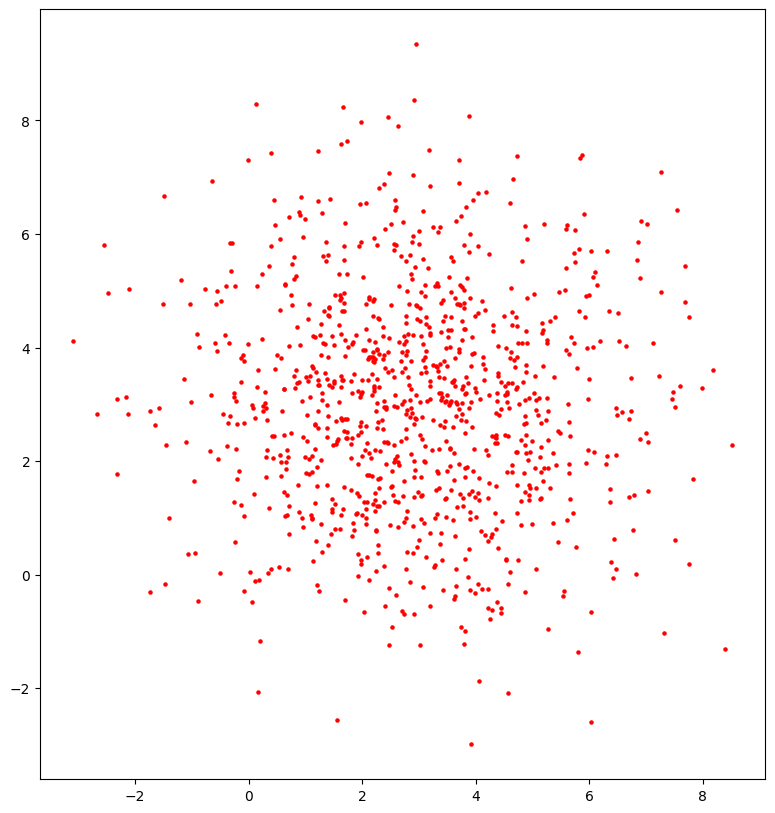

In [15]:
error_points.plot(color='r', markersize=5, figsize=(20, 10))

In [16]:
error_points.head()

,x,y,geometry
0,6.528105,4.111925,POINT (6.528 4.112)
1,3.800314,4.784948,POINT (3.800 4.785)
2,4.957476,2.155370,POINT (4.957 2.155)
3,7.481786,3.209428,POINT (7.482 3.209)
4,6.735116,3.456107,POINT (6.735 3.456)


In [19]:
len(error_points)

1000

<Axes: >

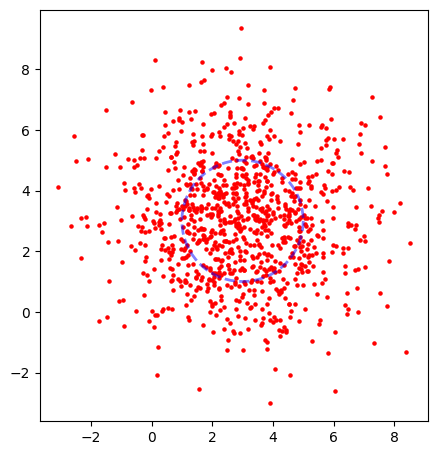

In [24]:
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf.buffer(2)
ax = error_points.plot(color='r', markersize=5, figsize=(5, 7))
gdf_buffer.plot(ax = ax, alpha = 0.5, linestyle='--',  facecolor='none', edgecolor='blue', linewidth=2)

In [25]:
error_points.geometry.within(gdf_buffer.geometry.values[0]).sum()

417

In [26]:
error_points.geometry.within(gdf_buffer.geometry.values[0]).sum()/ len(error_points)

0.417

In [27]:
point = Point(mean_x, mean_y)  # Center point
gdf = gpd.GeoDataFrame(geometry=[point])

def num_of_points_in_radius(gdf, radius):
  gdf_buffer = gdf.copy()
  gdf_buffer['geometry'] = gdf.buffer(radius)
  return error_points.geometry.within(gdf_buffer.geometry.values[0]).sum()

In [29]:
start_radius = 2
ref_points = len(error_points)
alpha_rate = 0.01
radius = start_radius
stop_condition = 0.5
for i in range(100):
  ratio = num_of_points_in_radius(gdf, radius)/ref_points
  if ratio > stop_condition:
    print('Stop condition reached')
    print(f"radisus: {round(radius,3)}")
    break
  else:
    print(f"{ratio:.2%}")
    radius += alpha_rate


41.70%
41.80%
42.30%
42.60%
42.80%
43.30%
43.30%
43.70%
44.20%
44.20%
44.80%
45.20%
46.00%
46.20%
46.40%
46.60%
47.00%
47.30%
47.40%
47.70%
47.90%
48.40%
49.00%
49.50%
49.70%
50.00%
Stop condition reached
radisus: 2.26


<Axes: >

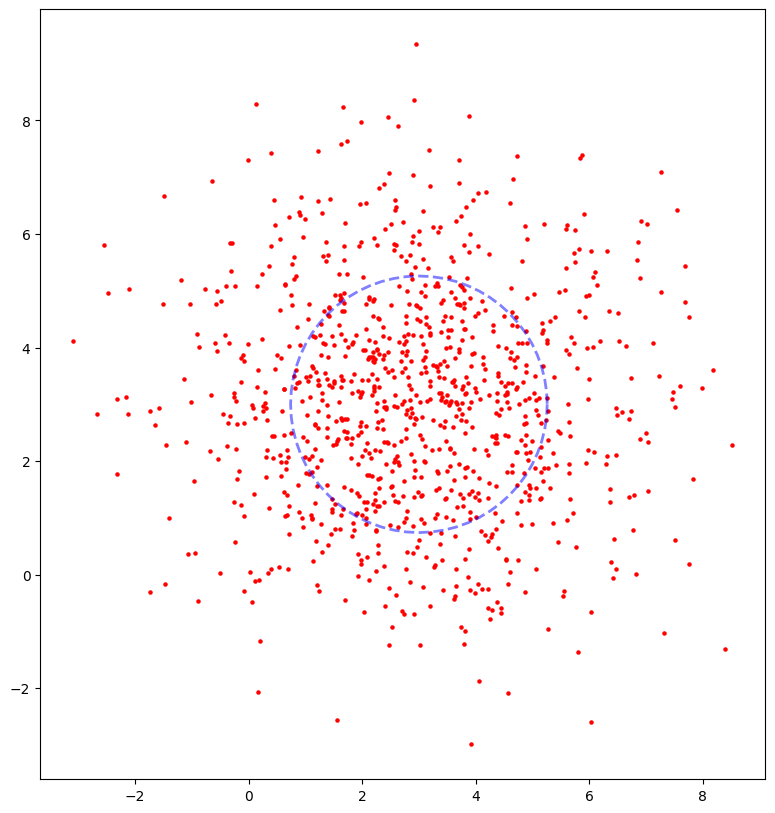

In [33]:
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf.buffer(2.26)
ax = error_points.plot(color='r', markersize=5, figsize=(10, 10))
gdf_buffer.plot(ax = ax, alpha = 0.5, linestyle='--',  facecolor='none', edgecolor='blue', linewidth=2)

# 2. Geopandas and pandas sort


In [35]:
# Define center point
point = Point(mean_x, mean_y)  # Center point

In [39]:
error_points['geometry'].apply(lambda p: p.distance(point))

0      3.699176
1      1.956155
2      2.131927
3      4.486677
4      3.762861
         ...   
995    0.848569
996    2.830993
997    0.368638
998    3.237870
999    2.718006
Name: geometry, Length: 1000, dtype: float64

In [40]:
error_points['distance_to_center'] = error_points['geometry'].apply(lambda p: p.distance(point))

In [44]:
error_points_sorted_by_distnace = error_points.sort_values('distance_to_center').reset_index(drop=True)

In [45]:
error_points_sorted_by_distnace.head()

,x,y,geometry,distance_to_center
0,3.024464,3.037255,POINT (3.024 3.037),0.044569
1,2.863517,2.933361,POINT (2.864 2.933),0.151883
2,3.149173,3.053477,POINT (3.149 3.053),0.158469
3,2.850664,3.082164,POINT (2.851 3.082),0.170447
4,2.953154,3.165222,POINT (2.953 3.165),0.171735


In [47]:
error_points_sorted_by_distnace.loc[500]

x                                                       5.234033
y                                                       2.731734
geometry              POINT (5.234032576191706 2.73173443446316)
distance_to_center                                      2.250082
Name: 500, dtype: object

<Axes: >

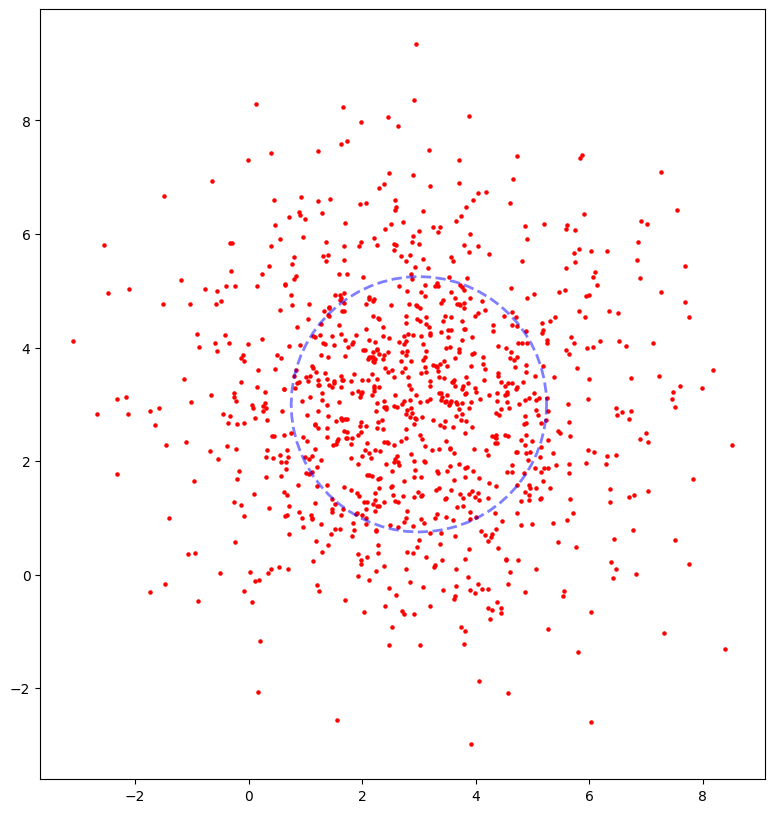

In [48]:
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf.buffer(2.25)
ax = error_points.plot(color='r', markersize=5, figsize=(10, 10))
gdf_buffer.plot(ax = ax, alpha = 0.5, linestyle='--',  facecolor='none', edgecolor='blue', linewidth=2)

## Use statistical normal distribution to find 90th percentile

In [59]:
# Assuming normal distribution!

mean_distnace = error_points['distance_to_center'].mean()
std_distance = error_points['distance_to_center'].std()

In [60]:
percentile_90 = norm.ppf(0.90, loc=mean_distnace, scale=std_distance) # calculate Z-score with respect to Mean and Standard deviation

In [61]:
percentile_90

4.097327822935554

In [62]:
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf.buffer(percentile_90)
error_points.geometry.within(gdf_buffer.geometry.values[0]).sum()/ len(error_points)

0.89

<Axes: >

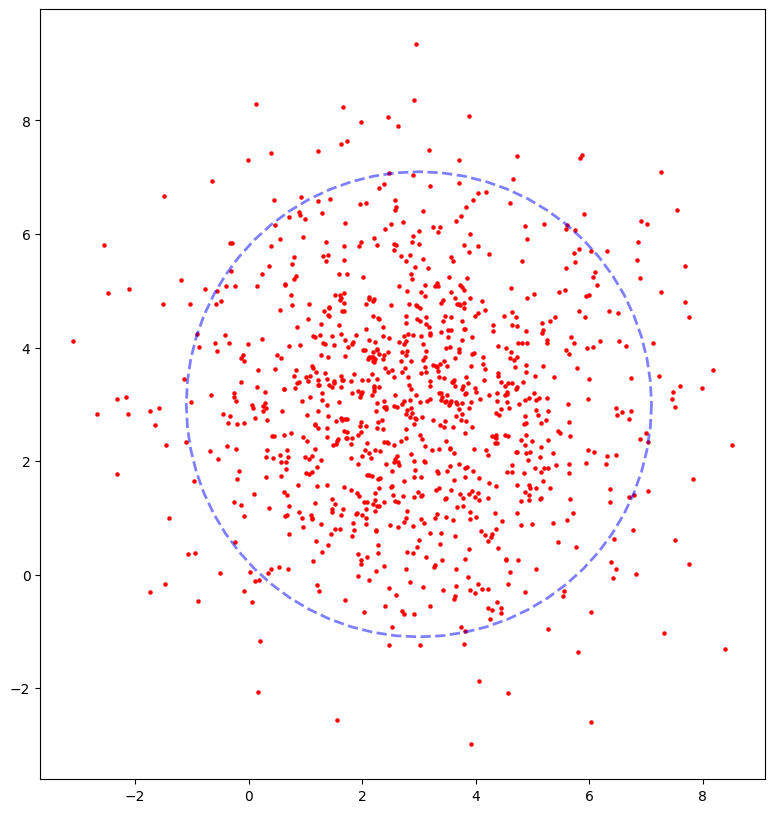

In [64]:
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf.buffer(percentile_90)
ax = error_points.plot(color='r', markersize=5, figsize=(10, 10))
gdf_buffer.plot(ax = ax, alpha = 0.5, linestyle='--',  facecolor='none', edgecolor='blue', linewidth=2)

# 3. Geopandas and STRtree

<Axes: >

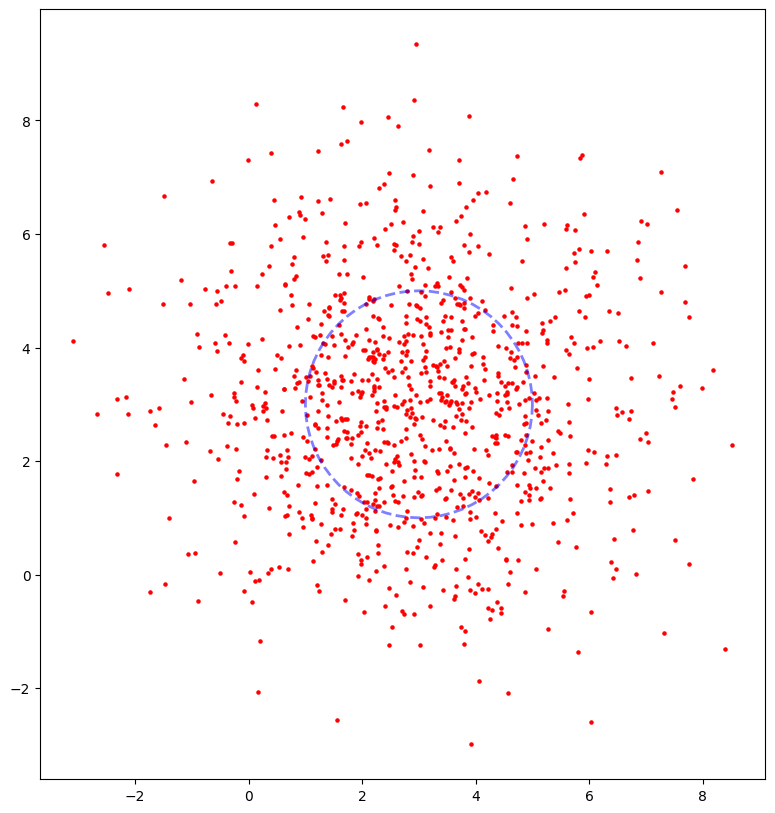

In [66]:
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf.buffer(2)
ax = error_points.plot(color='r', markersize=5, figsize=(10, 10))
gdf_buffer.plot(ax = ax, alpha = 0.5, linestyle='--',  facecolor='none', edgecolor='blue', linewidth=2)

In [84]:
import time


# Record the start time
start_time = time.time()

print(error_points.geometry.within(gdf_buffer.geometry.values[0]).sum()/ len(error_points))

# Record the end time
end_time = time.time()

# Calculate the elapsed time
time_taken = end_time - start_time

print("Time taken:", time_taken, "seconds")

0.417
Time taken: 0.009654998779296875 seconds


In [87]:
# Record the start time
start_time = time.time()

print(len(error_points.loc[error_points.sindex.intersection(gdf_buffer.geometry.values[0].bounds)])/len(error_points))
# Record the end time
end_time = time.time()

# Calculate the elapsed time
time_taken = end_time - start_time

print("Time taken:", time_taken, "seconds")

0.498
Time taken: 0.0023431777954101562 seconds


In [91]:
subset = error_points.loc[error_points.sindex.intersection(gdf_buffer.geometry.values[0].bounds)]

<Axes: >

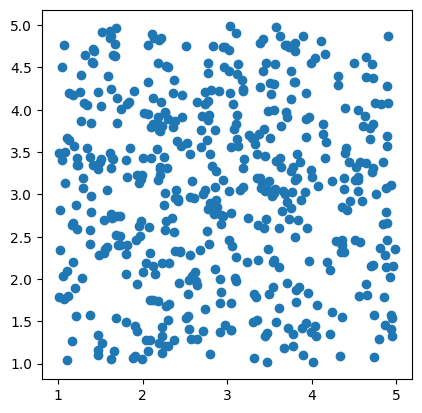

In [92]:
subset.plot()

In [93]:
# Record the start time
start_time = time.time()

subset = error_points.loc[error_points.sindex.intersection(gdf_buffer.geometry.values[0].bounds)]
print(subset.geometry.within(gdf_buffer.geometry.values[0]).sum()/ len(error_points))
# Record the end time
end_time = time.time()

# Calculate the elapsed time
time_taken = end_time - start_time

print("Time taken:", time_taken, "seconds")

0.417
Time taken: 0.007258892059326172 seconds


# Git Why?

1. Backup your work
2. Avoid double management
3. Document changes
4. Enable experimentation without messing around a stable verison
5. (GitHub) Centralize backup
6. (GitHub) Collaborative work

# Git How?

<img src='../../images/git_how.png'/>

**Create a git repository**

Open git bash in a new folder

`git init`

This inialized an empty git repository in your folder

**Add your first change to the "stage"**

Create a new text file - for example hello.txt, in the text file write "world", you can use git bash to do this in one line

1. `echo "world" > hello.txt`

Check the status of git

2. `git status`

you should get a message like this:

```
On branch main

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	hello.txt

nothing added to commit but untracked files present (use "git add" to track)
```

Now we will add files to the stage

3. `git add hello.txt`

let's check the status now

4. `git status`

You should see a message like this:

```
On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   hello.txt
```

**git commit**

`git commit -m "my first commit"`

**See log**

`git log`

## Github

1. create a new repostiroy in github
2. open git bash
3. `git clone "git@github.com:Shai2u/NAME_OF_REPO.git"`
4. `cd NAME_OF_REPO`

5. type the following commands in git bash
```
echo "# helloWorld" >> README.md
git add README.md
git commit -m "first commit"
git branch -M main
git push -u origin main
```


## Pull and rebase

pulls the latest version from git and if no conflict are found fast forward to the latest commit

`git pull -r`

## Branches oy vey

1. Distinguish between development and stable version
2. Try out different ideas, experiment
3. Parallel development


## Scnearion 1 - Side development in a side branch and than merge

**create a new brach**

`create branch new_feature`

**switch branch**

`git branch new_feature`


**Add Change**
`echo "# helloWorld123" >> README123.md`

`git add README123.md`

`git commit -m "added new file"`

**Push new branch first time**
`git push --set-upstream origin new_feature`

**switch to main**
`git switch main`

**Merge new_feature to main**
`git merge new_feature`

```
Updating 1277c64..3e461db
Fast-forward
 README123.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README123.md
```

**push changes to github**
`git push origin`

**see changes in log**
`git log`


# Git in Visual Stuido Code vs Terminal

**Create a change**
<img src='../../images/git_1_detect_changes.png'/>
<br/>
**Add files to stage**
<img src='../../images/git_2_add_to_stage.png'/>

**Commit changes**
<img src='../../images/git_3_commit_changes.png'/>

**Push change**
<img src='../../images/git_4_push_changes.png'/>

**Create branch**
<img src='../../images/git_5_create_new_branch.png'/>

<img src='../../images/git_6_name_new_branch.png'/>

**Switch branch**
<img src='../../images/git_7_switch_branch.png'/>

